<a href="https://colab.research.google.com/github/MeghnaRaje1/language-detector-trigram-model/blob/main/language_trigram_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT - 1

Import libraries

In [ ]:
import re
import os
import tarfile
import sys
from random import random
from math import log
from collections import defaultdict


tri_counts=defaultdict(int) #counts of all trigrams in input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/assignment1-data.tgz") as f:
  print("hi")

hi


In [ ]:
%%time
f = tarfile.open("/content/drive/MyDrive/Colab Notebooks/assignment1-data.tgz")
f_english = f.extractfile("training.en").read()

CPU times: user 10.6 ms, sys: 0 ns, total: 10.6 ms
Wall time: 243 ms


In [ ]:
%%time
f_english_opened = open("training.en")

FileNotFoundError: ignored

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/training.en") as f:
  corpus_english = f.read()
  #print(corpus_english[:10])
  

Preprocessing - tokenisation

In [ ]:
#lowercasing
def preprocess_line(line):
  '''
  This function does the following preprocessing tasks on a single line :-
  - It converts all uppercase charaters to lowercase.
  - It removes characters other than lexical english alphabets, numbers, spaces, '.' 
  - It removes newline characters from the line
  - It replaces all the digits with 0.
  - It appends hash (#) character at the beginning and the end of the line.
  '''
  line = re.sub(r'[^a-zA-Z0-9.\s]',r'',line).lower() 
  line = re.sub(r'[\n]','',line)
  line = re.sub(r'[0-9]',r'0',line)
  line="#"+line
  return line

#print(clean_corpus_english)
#sentences = clean_corpus_english.split("\n")
#print(tokens)
#print(len(sentences))
preprocess_line("hello This is 345._^4#here\nhey")


'#hello this is 000.0herehey'

Model Estimation

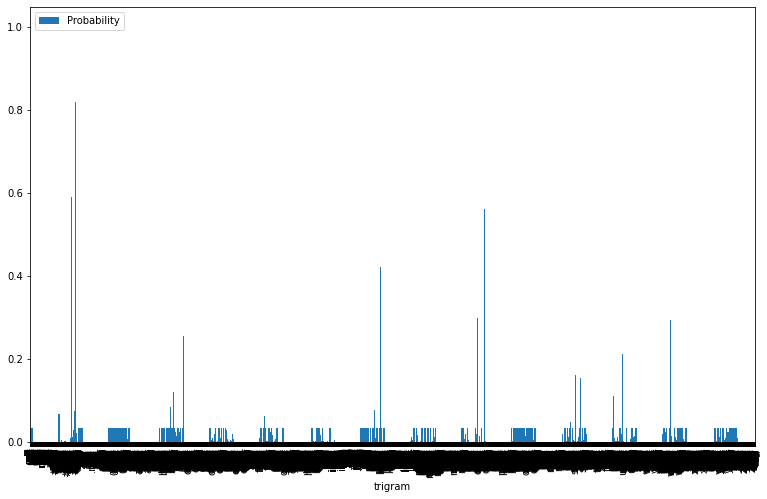

In [ ]:
import pandas as pd
  
# read text file into pandas DataFrame and create header with names
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/model-br.en", sep="\t", header=None, 
                 names=["trigram", "Probability"])
import matplotlib.pyplot as mp
 
df.plot(x="trigram", y="Probability",
        kind="bar", figsize=(13, 8))
 
# display plot
mp.show()

In [ ]:
def trigrams(corpus):
    trigrams = []
    print(len(corpus))
    for i in range(len(corpus)-2): 
      trigrams.append(corpus[i: i + 3])
    #print(trigrams)
    return trigrams


Bigrams

In [ ]:
#Implementing a model
def bigrams(corpus):
    bigrams = []
    for i in range(len(corpus)-2): 
      bigrams.append(corpus[i: i + 2])
    
    return bigrams

In [ ]:
trigramlist = []
bigramlist = []
corpus = ""
with open("/content/drive/MyDrive/Colab Notebooks/training.de") as f:
    lines = f.readlines()
    for line in lines:
      #print(line)
      corpus += preprocess_line(line)
    print(corpus)
    print(len(corpus))
    trigramlist.append(trigrams(corpus))
    bigramlist.append(bigrams(corpus))

    print(" List of trigrams")
    print(" List of bigrams:")
    print(bigramlist)
    print(trigramlist)

#wiederaufnahme der sitzungsperiode#ich erklre die am freitag dem 00. dezember unterbrochene sitzungsperiode des europischen parlaments fr wiederaufgenommen wnsche ihnen nochmals alles gute zum jahreswechsel und hoffe da sie schne ferien hatten.#wie sie feststellen konnten ist der gefrchtete milleniumbug  nicht eingetreten.#doch sind brger einiger unserer mitgliedstaaten opfer von schrecklichen naturkatastrophen geworden.#im parlament besteht der wunsch nach einer aussprache im verlauf dieser sitzungsperiode in den nchsten tagen.#heute mchte ich sie bitten  das ist auch der wunsch einiger kolleginnen und kollegen  allen opfern der strme insbesondere in den verschiedenen lndern der europischen union in einer schweigeminute zu gedenken.#ich bitte sie sich zu einer schweigeminute zu erheben.#das parlament erhebt sich zu einer schweigeminute.#frau prsidentin zur geschftsordnung.#wie sie sicher aus der presse und dem fernsehen wissen gab es in sri lanka mehrere bombenexplosionen mit zahlrei

In [ ]:
 import itertools
 merged_trigrams = list(itertools.chain(*trigramlist))
 merged_bigrams = list(itertools.chain(*bigramlist))
 print(merged_trigrams)
 print(merged_bigrams)

['#wi', 'wie', 'ied', 'ede', 'der', 'era', 'rau', 'auf', 'ufn', 'fna', 'nah', 'ahm', 'hme', 'me ', 'e d', ' de', 'der', 'er ', 'r s', ' si', 'sit', 'itz', 'tzu', 'zun', 'ung', 'ngs', 'gsp', 'spe', 'per', 'eri', 'rio', 'iod', 'ode', 'de#', 'e#i', '#ic', 'ich', 'ch ', 'h e', ' er', 'erk', 'rkl', 'klr', 'lre', 're ', 'e d', ' di', 'die', 'ie ', 'e a', ' am', 'am ', 'm f', ' fr', 'fre', 'rei', 'eit', 'ita', 'tag', 'ag ', 'g d', ' de', 'dem', 'em ', 'm 0', ' 00', '00.', '0. ', '. d', ' de', 'dez', 'eze', 'zem', 'emb', 'mbe', 'ber', 'er ', 'r u', ' un', 'unt', 'nte', 'ter', 'erb', 'rbr', 'bro', 'roc', 'och', 'che', 'hen', 'ene', 'ne ', 'e s', ' si', 'sit', 'itz', 'tzu', 'zun', 'ung', 'ngs', 'gsp', 'spe', 'per', 'eri', 'rio', 'iod', 'ode', 'de ', 'e d', ' de', 'des', 'es ', 's e', ' eu', 'eur', 'uro', 'rop', 'opi', 'pis', 'isc', 'sch', 'che', 'hen', 'en ', 'n p', ' pa', 'par', 'arl', 'rla', 'lam', 'ame', 'men', 'ent', 'nts', 'ts ', 's f', ' fr', 'fr ', 'r w', ' wi', 'wie', 'ied', 'ede', 'der'

In [ ]:
def find_trigram_frequencies(trigramlist):
  trigram_freq = {}
  for trigram in trigramlist:
    if trigram not in trigram_freq:
      trigram_freq[trigram] = 1
    else:
      trigram_freq[trigram] += 1
  print(trigram_freq)
  return trigram_freq


In [ ]:
def find_bigram_frequencies(bigramlist):
  bigram_freq = {}
  for bigram in bigramlist:
    if bigram not in bigram_freq:
      bigram_freq[bigram] = 1
    else:
      bigram_freq[bigram] += 1
  print(bigram_freq)
  return bigram_freq


In [ ]:
trigram_frequencies = find_trigram_frequencies(merged_trigrams)
bigram_frequencies = find_bigram_frequencies(merged_bigrams)
sorted_trigram_freq = dict(sorted(trigram_frequencies.items(), key=lambda item: item[1], reverse=True))
sorted_bigram_freq = dict(sorted(bigram_frequencies.items(), key=lambda item: item[1], reverse=True))
print(len(sorted_trigram_freq))
print(len(sorted_bigram_freq))

{'#wi': 79, 'wie': 170, 'ied': 136, 'ede': 149, 'der': 1438, 'era': 111, 'rau': 194, 'auf': 325, 'ufn': 4, 'fna': 3, 'nah': 45, 'ahm': 55, 'hme': 106, 'me ': 76, 'e d': 370, ' de': 1648, 'er ': 1927, 'r s': 257, ' si': 436, 'sit': 57, 'itz': 24, 'tzu': 69, 'zun': 89, 'ung': 1046, 'ngs': 174, 'gsp': 27, 'spe': 39, 'per': 49, 'eri': 263, 'rio': 49, 'iod': 28, 'ode': 83, 'de#': 2, 'e#i': 1, '#ic': 110, 'ich': 1671, 'ch ': 1067, 'h e': 71, ' er': 316, 'erk': 107, 'rkl': 41, 'klr': 19, 'lre': 13, 're ': 183, ' di': 1221, 'die': 1311, 'ie ': 1287, 'e a': 287, ' am': 43, 'am ': 57, 'm f': 28, ' fr': 453, 'fre': 26, 'rei': 235, 'eit': 627, 'ita': 14, 'tag': 51, 'ag ': 67, 'g d': 294, 'dem': 125, 'em ': 276, 'm 0': 21, ' 00': 126, '00.': 16, '0. ': 12, '. d': 8, 'dez': 10, 'eze': 18, 'zem': 4, 'emb': 14, 'mbe': 10, 'ber': 489, 'r u': 122, ' un': 988, 'unt': 113, 'nte': 213, 'ter': 415, 'erb': 91, 'rbr': 8, 'bro': 8, 'roc': 16, 'och': 149, 'che': 823, 'hen': 553, 'ene': 157, 'ne ': 289, 'e s': 2

ESTIMATION

In [ ]:
alphabets = [' ','#','.','0','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
complete_trigrams = []
for alpha1 in alphabets:
    for alpha2 in alphabets:
      
      if alpha2=="#":
        continue
      else:
        for alpha3 in alphabets:
            complete_trigrams.append(alpha1+alpha2+alpha3)


In [ ]:
def estimate_probabilities(trigram_frequencies,bigram_frequencies,complete_trigrams):
  ''' This function accepts trigram and biagram frequency dictionary and estimates probabilities using alpha smoothing'''
  trigram_prob = {}
  alpha=0.12
  for trigram in complete_trigrams:
    if trigram not in trigram_frequencies:
      trigram_frequencies[trigram]=0
    if trigram[:-1] not in bigram_frequencies:
      bigram_frequencies[trigram[:-1]] =0
    trigram_prob[trigram] = (trigram_frequencies[trigram] + alpha)/(bigram_frequencies[trigram[:-1]] + (alpha * len(trigram_frequencies)))   
  return trigram_prob


In [ ]:
prob_estimations = estimate_probabilities(trigram_frequencies,bigram_frequencies,complete_trigrams)
model = dict(sorted(prob_estimations.items(), key=lambda item: item[1], reverse=True))
model

{' un': 0.5774292326032584,
 ' be': 0.5770774597410046,
 'en ': 0.5425978226477447,
 'ich': 0.5025864350504053,
 'die': 0.49628295002043993,
 ' zu': 0.40732423044676,
 ' ge': 0.4005963899375059,
 ' de': 0.38686446645697387,
 ' fr': 0.36738665109943563,
 ' ko': 0.35220021820345815,
 'der': 0.34656834393676494,
 ' au': 0.3252339058790672,
 ' vo': 0.3201922026864694,
 'ie ': 0.31681238185255195,
 'er ': 0.3139225000162897,
 ' in': 0.3067672822753249,
 ' ei': 0.29751766624388476,
 ' wi': 0.2897114739431894,
 'sch': 0.2879092932075872,
 ' di': 0.2866102108642995,
 ' re': 0.28592557061198387,
 ' pr': 0.2823015760329405,
 '000': 0.271585061716703,
 'ein': 0.26202514191161264,
 'ion': 0.2595337458627141,
 ' ve': 0.258912229901385,
 'nd ': 0.23694031868975887,
 ' ha': 0.23159937359569688,
 'ch ': 0.2292397057812607,
 'ach': 0.22364038009747889,
 'as ': 0.22343656938653964,
 ' mi': 0.21605667060212516,
 'ung': 0.21406530084388528,
 ' si': 0.21385559892513192,
 'gen': 0.2116189094426309,
 'den': 

Predict characters

In [ ]:
import random

initial_seed = merged_bigrams[random.randint(0,len(merged_bigrams))]
print(initial_seed)

io


In [ ]:
def generate_from_LM(seed, model):
  '''
  In this function a 2-d dictionary is created that stores the bigrams as keys and the value is
  again a dictionary having possible trigrams that can be generated from that bigram history as key, 
  and probability of the trigram as value. 

  It takes the initial seed as an argument, returns a 300 character sequence string.
  
  Each next character is generated using the trigram having the highest probability given the bigram history.
  '''
  generated_string = "" + seed
  next_char_prob_distribution = {} #This is the 2-d dictionary

  for trigram in model:
    if trigram[:-1] not in next_char_prob_distribution:
      trigram_distribution = {}
      trigram_distribution[trigram] = model[trigram]
      next_char_prob_distribution[trigram[:-1]] = trigram_distribution
    else:
      next_char_prob_distribution[trigram[:-1]][trigram] = model[trigram]
  print("Trigram probability distribution for each bigram history: ")
  print(next_char_prob_distribution)
  #sort the trigram dictionary for each of the bigram keys
  for bigram in next_char_prob_distribution:
    next_char_prob_distribution[bigram] = dict(sorted(next_char_prob_distribution[bigram].items(), key=lambda item: item[1], reverse=True))
  
  #generate 2(seed) + 298 characters
  for i in range(298):
    #print(generated_string)
    if generated_string[-1] is "#":
      seed = generated_string[-3] + generated_string[-2]
    else:
      seed = generated_string[-2:]  

    next_char_trigram = next(iter(next_char_prob_distribution[seed])) #get the first value in the dictionary
    #print(next_char_trigram)
    next_char_probability = next_char_prob_distribution[seed][next_char_trigram]
    # We remove this trigram now and later append to the end of the sorted dictionary. 
    # This is done so that after every character generated, the trigram should be moved to the end so that next
    # time the next most likely trigram in the sorted dictionary is generated. 
    del next_char_prob_distribution[seed][next_char_trigram] 
    next_char = next_char_trigram[-1]    
    next_char_prob_distribution[seed][next_char_trigram] = next_char_probability
    generated_string = generated_string + next_char
  print("Generated sequence of 300 characters:- ")
  return generated_string
  
generate_from_LM(initial_seed,model)

NameError: ignored

In [ ]:
given_model = {}
x = df["trigram"]
y = df["Probability"]
x = x.tolist()
for i in range(len(x)):
  given_model[x[i]] = y[i]
print(given_model)
generate_from_LM(initial_seed,given_model)

{'   ': 0.03333, '  #': 0.03333, '  .': 0.03333, '  0': 0.03333, '  a': 0.03333, '  b': 0.03333, '  c': 0.03333, '  d': 0.03333, '  e': 0.03333, '  f': 0.03333, '  g': 0.03333, '  h': 0.03333, '  i': 0.03333, '  j': 0.03333, '  k': 0.03333, '  l': 0.03333, '  m': 0.03333, '  n': 0.03333, '  o': 0.03333, '  p': 0.03333, '  q': 0.03333, '  r': 0.03333, '  s': 0.03333, '  t': 0.03333, '  u': 0.03333, '  v': 0.03333, '  w': 0.03333, '  x': 0.03333, '  y': 0.03333, '  z': 0.03333, ' . ': 0.03333, ' .#': 0.03333, ' ..': 0.03333, ' .0': 0.03333, ' .a': 0.03333, ' .b': 0.03333, ' .c': 0.03333, ' .d': 0.03333, ' .e': 0.03333, ' .f': 0.03333, ' .g': 0.03333, ' .h': 0.03333, ' .i': 0.03333, ' .j': 0.03333, ' .k': 0.03333, ' .l': 0.03333, ' .m': 0.03333, ' .n': 0.03333, ' .o': 0.03333, ' .p': 0.03333, ' .q': 0.03333, ' .r': 0.03333, ' .s': 0.03333, ' .t': 0.03333, ' .u': 0.03333, ' .v': 0.03333, ' .w': 0.03333, ' .x': 0.03333, ' .y': 0.03333, ' .z': 0.03333, ' 0 ': 0.03333, ' 0#': 0.03333, ' 0.': 

'ione.#   #.  0  a bookay.# . #.. 0#.0 #.a put the to you wan take do tere back.# 00 0a daddy..#.b trusee are..0#.c for tur bunna se.00#.d ting twoures tlet it and yeah.# at dragon yaright.# blood is all t yl in her hats i t#.e his.# cant hose if t0 aboy.0a#.f y did agetty.a#.g on.# ducks..a0 byes.0b'

In [ ]:
def compute_perplexity(model):
    """
    Computes a perplexity of model based on given probabilities.

    Args:
        model(dictionary of trigrams and it's probabilities)
    Returns:
        perplexity(float): perplexity for the model
        
    """
    import math
    # Compute perplexity per word and variance of perplexities in the samples
    total_probability=0
    for prob in model.values():
      total_probability=total_probability+(prob*(math.log2(prob)))
    entropy=(-(total_probability))
    print("Total prob",total_probability)
    print("Entropy: ",entropy)
    perplexity=2**(entropy)
    
    print("Perplexity: ",perplexity)
    return perplexity
#compute_perplexity(model)


In [ ]:
trigramlist = []
bigramlist = []
corpus = ""
with open("/content/drive/MyDrive/Colab Notebooks/test") as f:
    lines = f.readlines()
    for line in lines:
      #print(line)
      corpus += preprocess_line(line)
    print(corpus)
    print(len(corpus))
    trigramlist.append(trigrams(corpus))
    bigramlist.append(bigrams(corpus))
print(" List of trigrams")
print(" List of bigrams:")
print(bigramlist)
print(trigramlist)
import itertools
test_merged_trigrams = list(itertools.chain(*trigramlist))
test_merged_bigrams = list(itertools.chain(*bigramlist))
print(test_merged_trigrams)
print(test_merged_bigrams)

#musharrafs last act#general musharraf appeared on the national scene on october 00 0000 when he ousted an elected government and announced an ambitious nationbuilding project.#many pakistanis disillusioned with pakistans political class remained mute thinking that he might deliver.#the september 00 0000 terrorist attacks on america brought musharraf into the international limelight as he agreed to ditch the taliban and support the united statesled war on terror.#musharraf clamped down on some religious militants operating inside pakistan and also on those fighting indian forces in kashmir.#as a result pakistan was rewarded with american financial assistance and arms.#in furtherance of his realignment musharraf sent the pakistani army into the tribal areas bordering afghanistan for the first time since pakistans independence.#operations there against taliban and alqaeda forces brought mixed results.#although the us viewed musharraf as an agent of change he has never achieved domestic p

In [ ]:
import pandas as pd 
# read text file into pandas DataFrame and create header with names
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/model-br.en", sep="\t", header=None, 
                 names=["Trigram", "Probability"])
given_model = dict(zip(df.Trigram,df.Probability))
print("Model: ",given_model)
compute_perplexity(given_model)

Model:  {'   ': 0.03333, '  #': 0.03333, '  .': 0.03333, '  0': 0.03333, '  a': 0.03333, '  b': 0.03333, '  c': 0.03333, '  d': 0.03333, '  e': 0.03333, '  f': 0.03333, '  g': 0.03333, '  h': 0.03333, '  i': 0.03333, '  j': 0.03333, '  k': 0.03333, '  l': 0.03333, '  m': 0.03333, '  n': 0.03333, '  o': 0.03333, '  p': 0.03333, '  q': 0.03333, '  r': 0.03333, '  s': 0.03333, '  t': 0.03333, '  u': 0.03333, '  v': 0.03333, '  w': 0.03333, '  x': 0.03333, '  y': 0.03333, '  z': 0.03333, ' . ': 0.03333, ' .#': 0.03333, ' ..': 0.03333, ' .0': 0.03333, ' .a': 0.03333, ' .b': 0.03333, ' .c': 0.03333, ' .d': 0.03333, ' .e': 0.03333, ' .f': 0.03333, ' .g': 0.03333, ' .h': 0.03333, ' .i': 0.03333, ' .j': 0.03333, ' .k': 0.03333, ' .l': 0.03333, ' .m': 0.03333, ' .n': 0.03333, ' .o': 0.03333, ' .p': 0.03333, ' .q': 0.03333, ' .r': 0.03333, ' .s': 0.03333, ' .t': 0.03333, ' .u': 0.03333, ' .v': 0.03333, ' .w': 0.03333, ' .x': 0.03333, ' .y': 0.03333, ' .z': 0.03333, ' 0 ': 0.03333, ' 0#': 0.03333,

OverflowError: ignored

In [ ]:
train_dict={}
for trigram in test_merged_trigrams:
    if trigram in model:
      train_dict[trigram]=model[trigram]
    else:
      train_dict[trigram]=min(model.values())
print(train_dict)
compute_perplexity(train_dict)

{'#mu': 0.00018566654288897143, 'mus': 0.0005431198355122785, 'ush': 0.001355530696848062, 'sha': 0.014194716590681281, 'har': 0.007737055311306085, 'arr': 0.0013617327406798387, 'rra': 0.004255254014173975, 'raf': 0.0022325908087497495, 'afs': 0.00011240164855751218, 'fs ': 0.0022974963181148747, 's l': 0.006600937585402258, ' la': 0.09442021083242458, 'las': 0.011414653652507408, 'ast': 0.02536576662305222, 'st ': 0.06530834810146494, 't a': 0.03115993595445651, ' ac': 0.003053343710710651, 'act': 0.00010508248975445724, 'ct#': 0.0001085383502170767, 't#g': 1.6232624328375168e-05, '#ge': 0.013299266247379454, 'gen': 0.2116189094426309, 'ene': 0.023014905784194243, 'ner': 0.06163942545814761, 'era': 0.018100431986551733, 'ral': 0.005994933152732837, 'al ': 0.027701039730775028, 'l m': 0.003907528247771939, ' mu': 0.03174557490286372, 'af ': 0.0001126422107911238, 'f a': 0.003993526832324076, ' ap': 0.0015561407708881974, 'app': 0.006536226930963774, 'ppe': 0.006378403772834867, 'pea':

616.1493324021429

In [ ]:
min(model.values())

0.00020803274838103545

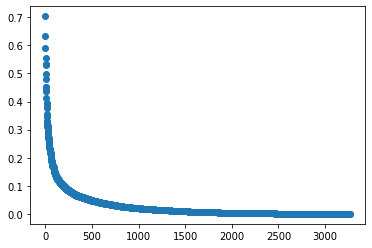

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(len(model)), list(model.values()))
#plt.xticks(range(len(model)), list(model.values()))
plt.show()

In [ ]:
given_model=dict(sorted(given_model.items(), key=lambda item: item[1], reverse=True))
print(sum(given_model.values()))
compute_perplexity(given_model)


870.9587320297271
Total prob 176045.18516401114
Entropy:  6.7450262514946795
Perplexity:  107.26430501707246


107.26430501707246

In [ ]:
print(len(complete_trigrams))

26100


In [ ]:
complete_trigrams-given_model.keys()


NameError: ignored